In [12]:
# Load Imports
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn.image import resample_img


import os
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from metrics import dice_coef
from utils import *


%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Aux. Functions
def resize_img(img_nii, target_shape=(150,150,150), mask=False):
    interp = ''
    if mask:
        interp = 'nearest'
    else:
        interp = 'continuous'
    new_img = resample_img(img_nii,
                           target_affine=img_nii.affine,
                           target_shape=target_shape,
                           interpolation=interp)
    return new_img


def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")

def show_rand_slices(img, resized_img, num_slice=4, view='side'):
    ''' Show num_slice random slices'''
    slices = [5, 49, 75, 120]
    if view == 'side':
        for slice_idx in slices:
            show_slice(img[:, :, slice_idx])
            plt.show()
            show_slice(resized_img[:, :, slice_idx])
            plt.show()
    elif view == 'back':
        for slice_idx in slices:
            show_slice(img[:, slice_idx, :])
            plt.show()
            show_slice(resized_img[:, slice_idx, :])
            plt.show()
    elif view == 'top':
        for slice_idx in slices:
            show_slice(img[slice_idx, :, :])
            plt.show()
            show_slice(resized_img[slice_idx, :, :])
            plt.show()
    else:
        print('Not a valid view.')


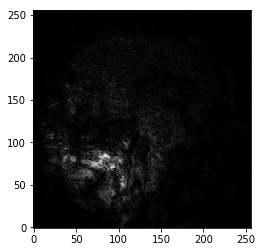

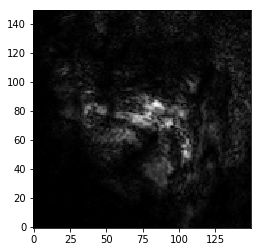

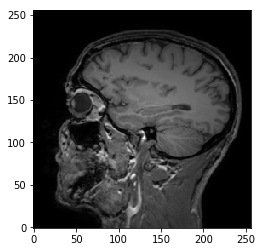

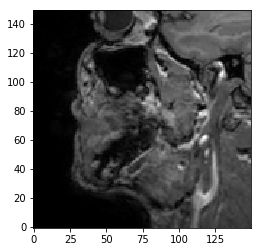

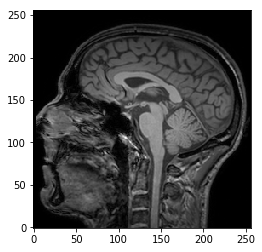

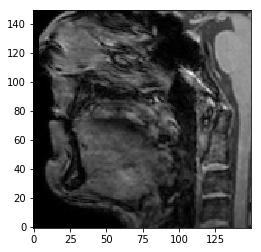

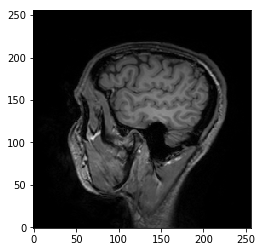

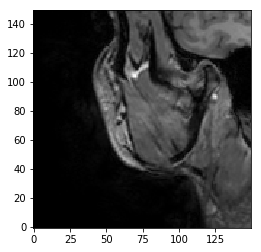

/home/shared/anaconda3/lib/python3.6/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


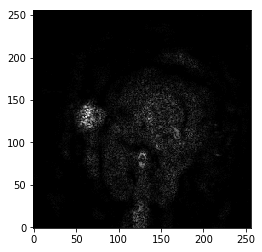

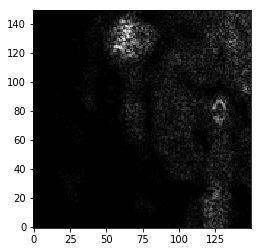

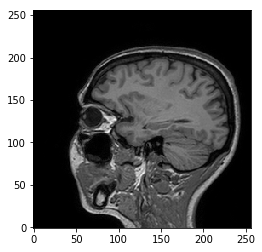

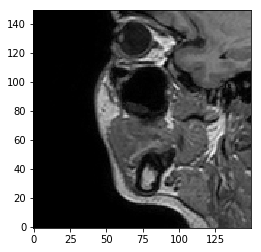

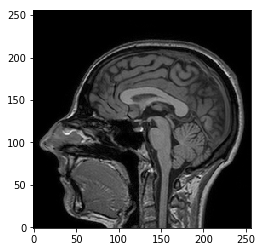

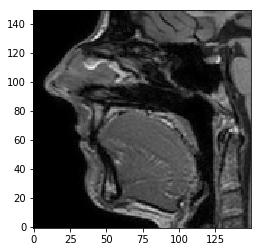

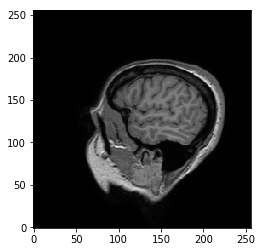

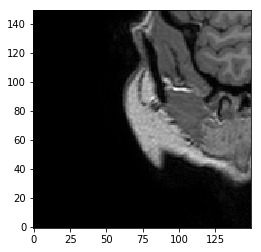

In [23]:
input_dir = '../data/subset'
total_files = get_file_list_from_dir(input_dir, y_label='_mask')
for img_fp, mask_fp in total_files:
    if 'ICBM' in img_fp:
        continue
    img_nii = nib.load(img_fp)
    small_img = resize_img(img_nii)
    show_rand_slices(img_nii.get_data(),
                     small_img.get_data())
    
     